<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 4.0 - Data modelling
</div>

This section for bouns, you might need to use some basic Machine Learning algorithms to answer some questions that in cases of regression, and classification. In this scope of this subject, highly recommend you use `scikit-learn` (instead of implement once again these algorithms)

In this section, I will use a Regression model to predict the `Electric Power Consumption`

## Import

In [70]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns

## Data preparation

### Load data

In [71]:
# YOUR CODE HERE (OPTION) 
data = pd.read_csv('../data/processed/21127657_europe_processed.csv')

data.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
0,2775634.0,1391086.0,1384548.0,10.813117,10.096538,9.0,26.361868,9.386339,8.456056,15.410524,...,7131.404452,19.002727,73.712777,74.398198,80.747814,95.606712,62.731991,97.748993,2022,Albania
1,2811666.0,1407212.0,1404454.0,10.240000,11.325000,9.0,21.562780,34.618040,39.186390,17.459200,...,7131.404452,19.002727,73.712777,74.087000,79.173000,97.604950,60.317581,98.223259,2021,Albania
2,2837849.0,1418585.0,1419264.0,10.285000,10.785000,9.0,20.781540,35.541970,40.169250,16.812830,...,7131.404452,44.580000,73.712777,74.632000,79.676000,100.613602,61.392578,99.468590,2020,Albania
3,2854191.0,1425363.0,1428828.0,10.343000,8.480000,9.0,20.150670,36.416850,41.600220,16.203900,...,7131.404452,40.110000,73.712777,77.168000,81.666000,104.310257,62.076092,101.720718,2019,Albania
4,2866376.0,1430495.0,1435881.0,10.517000,8.308000,9.0,19.745660,37.285730,42.271740,15.573180,...,7131.404452,37.830000,73.712777,77.037000,81.608000,107.403679,56.608871,105.708557,2018,Albania


### Review data and check missing values

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Total Population                            1120 non-null   float64
 1   Female Population                           1120 non-null   float64
 2   Male Population                             1120 non-null   float64
 3   Birth Rate                                  1120 non-null   float64
 4   Death Rate                                  1120 non-null   float64
 5   Compulsory Education Dur.                   1120 non-null   float64
 6   Employment in Industry(%)                   1120 non-null   float64
 7   Employment in Agriculture(%)                1120 non-null   float64
 8   Female Employment in Agriculture(%)         1120 non-null   float64
 9   Female Employment in Industry(%)            1120 non-null   float64
 10  Unemployment

- Except `Year` and `Country`, **all features** are numerical.
- There are no missing values in the dataset.
- The dataset has 1120 rows and 25 columns.

### Check duplicate

In [73]:
data.duplicated().sum()

0

- There is also no duplicate in the dataset. Good!!!

### Some statistics of features

In [74]:
data.describe()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year
count,1.120000e+03,1.120000e+03,1.120000e+03,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,...,1.120000e+03,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000
mean,1.399210e+07,7.200463e+06,6.791642e+06,10.813117,10.096538,10.231975,26.361868,9.386339,8.456056,15.410524,...,7.294217e+09,7131.404452,19.002727,73.712777,74.398198,80.747814,101.957624,58.904857,98.298326,2008.500000
std,2.085705e+07,1.072965e+07,1.013146e+07,1.913733,2.409081,1.272694,6.026379,9.186978,10.542010,6.075595,...,1.003593e+10,5553.170508,16.078600,16.239192,4.750116,3.172151,6.474821,18.957104,5.013217,8.081356
min,2.488600e+04,1.277900e+04,1.210700e+04,5.900000,5.549000,8.000000,9.394252,0.681637,0.355335,3.400538,...,2.000451e+05,663.783995,0.000000,10.254953,60.040000,67.842000,79.989571,7.483570,70.417259,1995.000000
25%,2.019648e+06,1.025421e+06,9.939572e+05,9.500000,8.500000,9.000000,22.301050,3.570461,1.969496,10.648418,...,1.082436e+09,4629.252891,6.827500,73.159773,71.983000,78.900000,99.354677,49.389390,98.225485,2001.750000
50%,5.376422e+06,2.743866e+06,2.625598e+06,10.699000,9.800000,10.000000,26.361868,7.010980,4.831188,15.410524,...,3.873084e+09,7131.404452,17.280000,73.712777,74.824500,80.935000,101.957624,58.904857,98.298326,2008.500000
75%,1.053030e+07,5.424500e+06,5.169164e+06,11.700000,11.100000,11.000000,30.384885,10.308420,8.890047,18.634595,...,7.294217e+09,7131.404452,24.737500,83.609269,78.100000,83.200000,103.408266,69.769903,99.486362,2015.250000
max,8.407981e+07,4.259320e+07,4.148661e+07,25.000000,21.700000,13.000000,43.132850,53.234490,64.889360,34.661940,...,5.022726e+10,54799.174708,82.790000,100.000000,82.600000,86.700000,151.889877,150.201767,131.990005,2022.000000


- All seems to be OK except `Compulsory Education Dur.`
- Most of the values in this column are integers, which is reasonable when discussing time intervals. Therefore, we will round these values to integers.

In [75]:
data["Compulsory Education Dur."] = data["Compulsory Education Dur."].round(0)
data["Compulsory Education Dur."].value_counts()

Compulsory Education Dur.
10.0    438
9.0     282
11.0    171
13.0     99
12.0     74
8.0      56
Name: count, dtype: int64

### Distribution of features

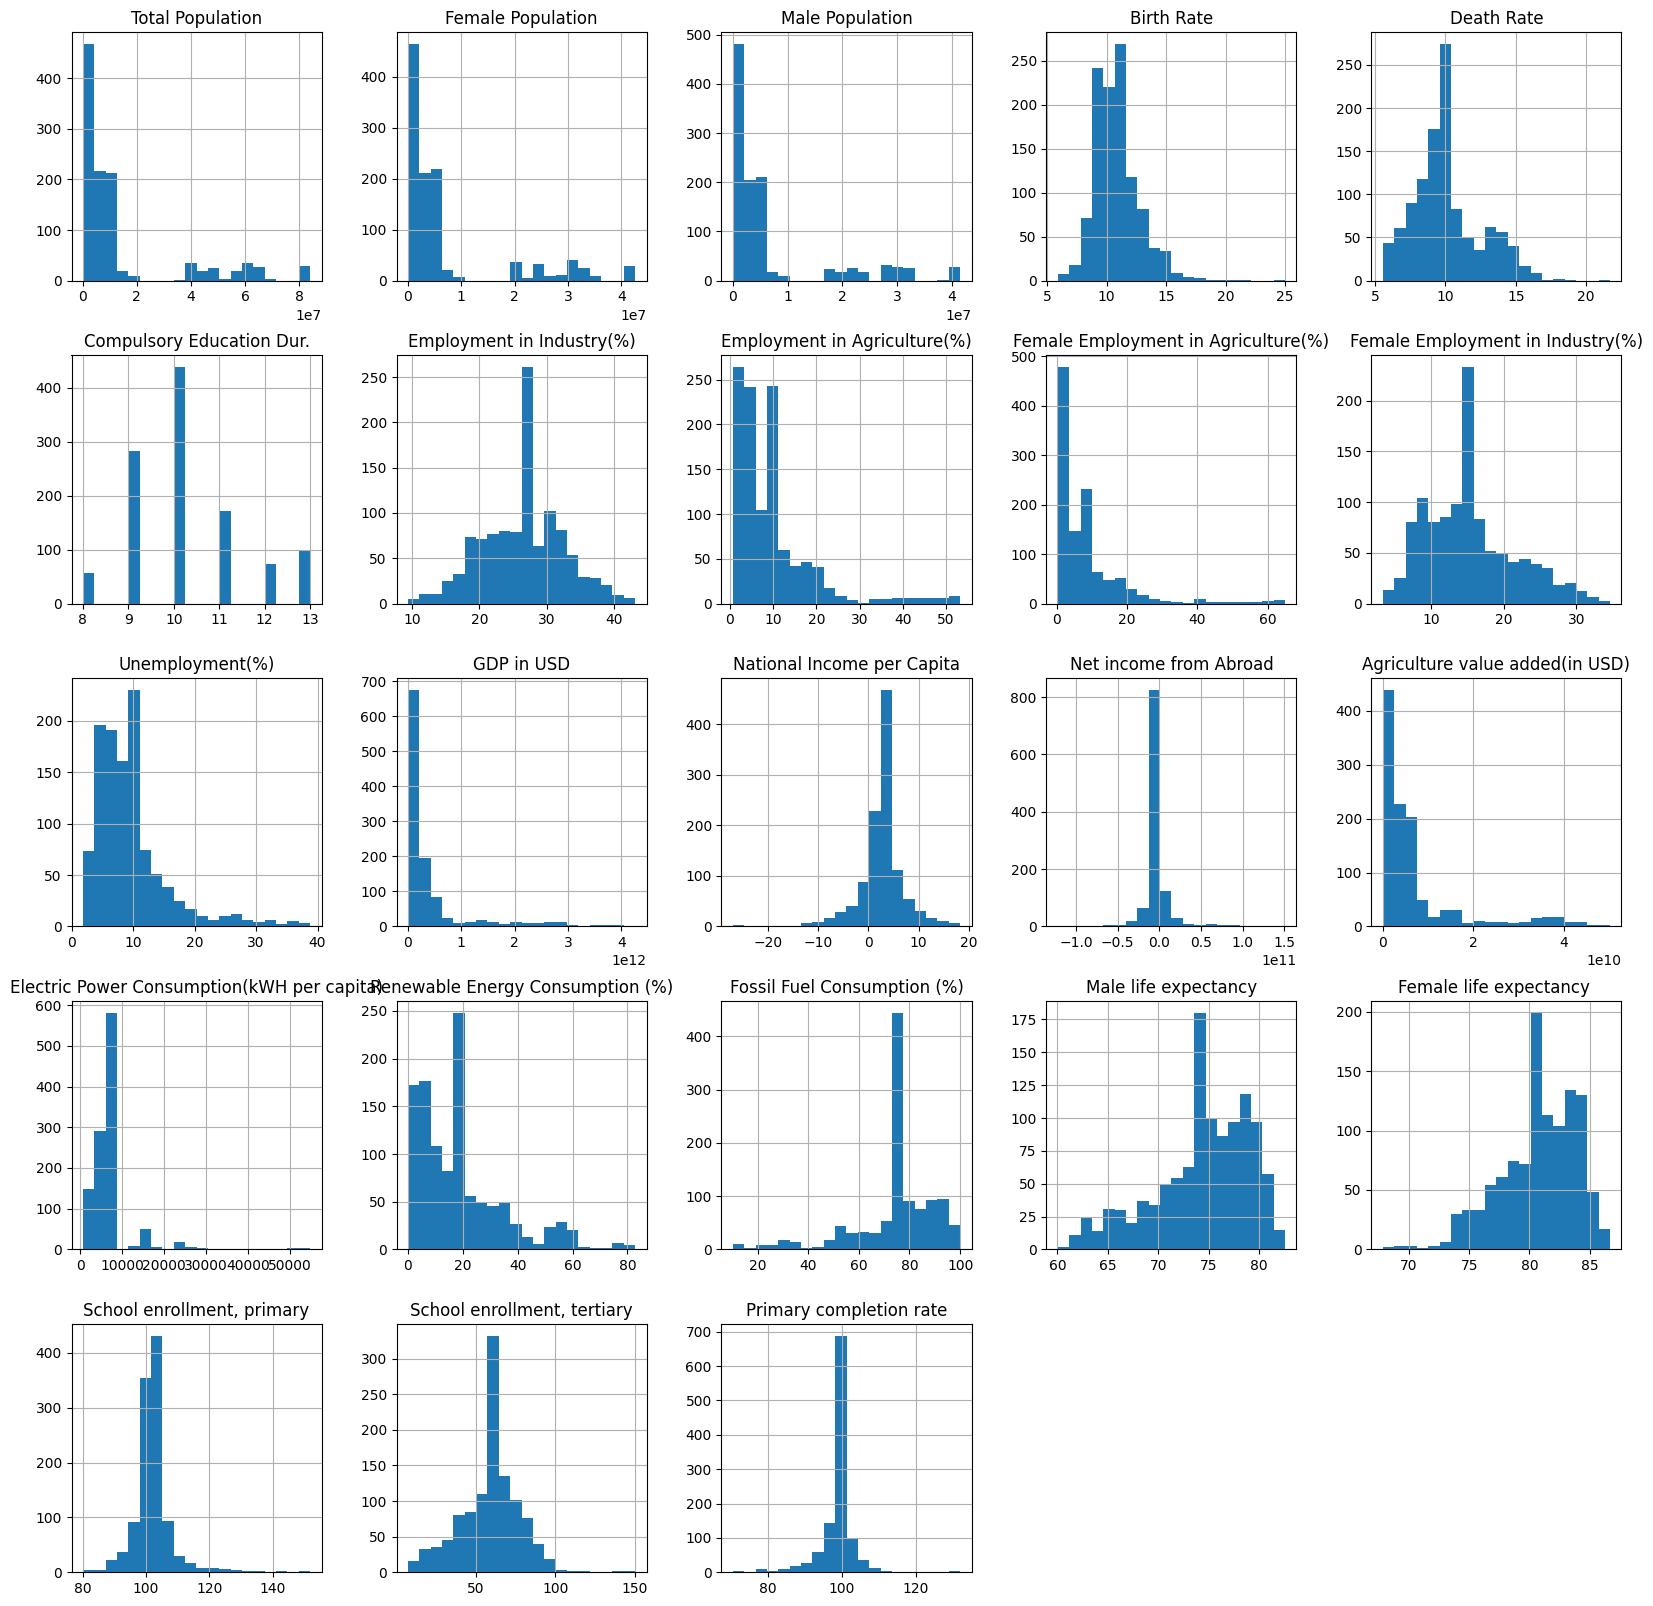

In [76]:
data.drop('Year', axis=1).hist(figsize=(20,20), bins=20)
plt.show()

### Correlation

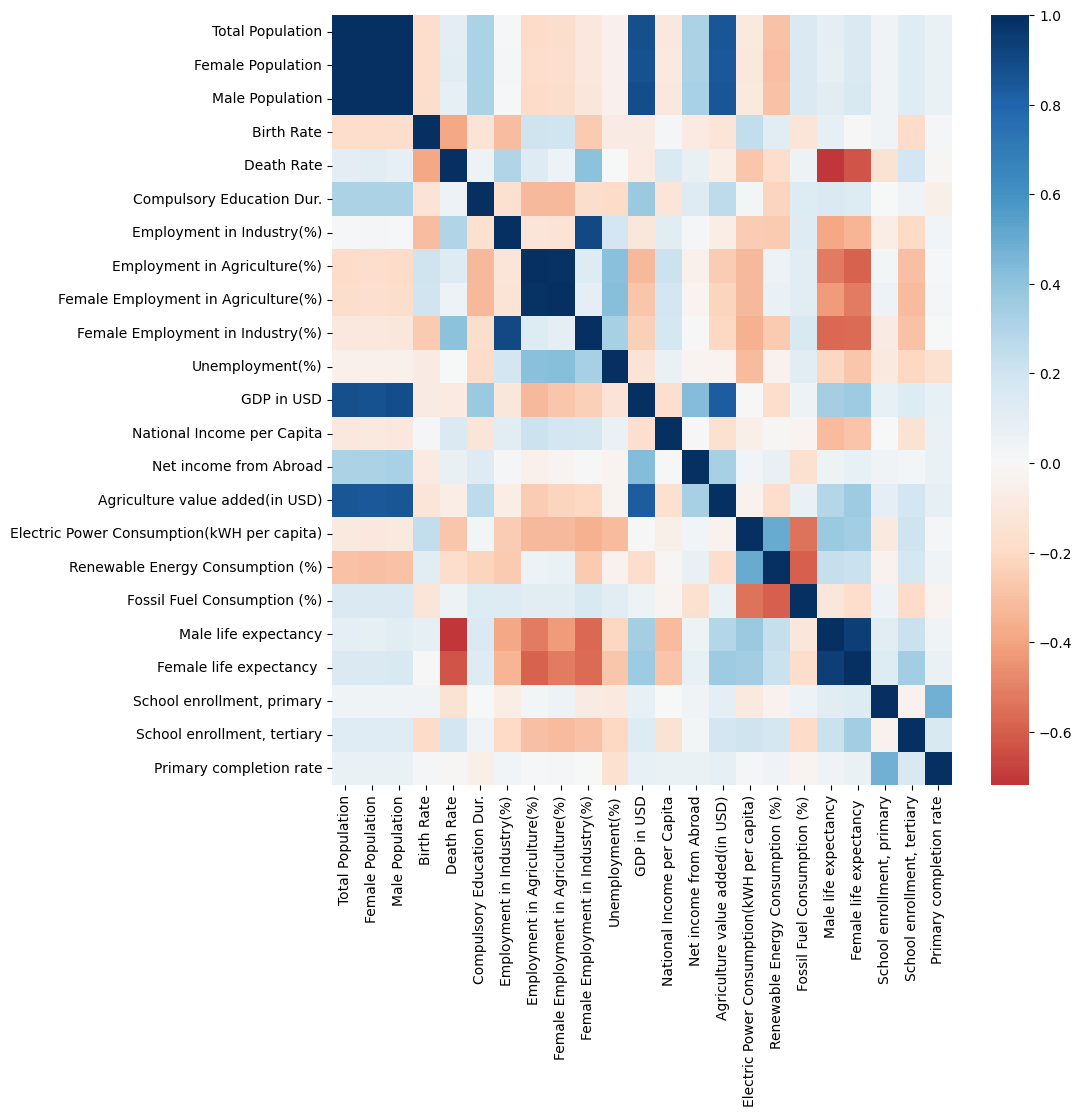

In [77]:
# create a copy
data_copy = data.copy()

# Exclude the categorical features from the matrix
data_copy.drop(['Year', 'Country'], inplace=True, axis='columns')

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

- Through observation, we notice that there are some features with very low correlation to `Electric Power Consumption`. Therefore, we can remove them from the model to reduce the dimensionality of the data and potentially improve the effectiveness of the machine learning model.
- Beside that, we also notice that there are some features with very high correlation to each other, because `correlated features` will **not always worsen your model**, but they **will not always improve it either**. Therefore, we can remove them from the model to reduce the dimensionality of the data and potentially improve the effectiveness of the machine learning model.

## Feature engineering

### Combine features
- We can combine `Female Population` and `Male Population` to become `Total Population` because they are correlated features. It is already in the dataset, so we just drop the two columns `Female Population` and `Male Population`.

In [78]:
data.drop(['Female Population', 'Male Population'], inplace=True, axis='columns')

- We can also combine `Female life expectancy ` and `Male life expectancy` (because they are also correlated features) to create a new feature `Avg life expectancy`. 

In [79]:
data["Avg life expectancy"] = data[["Female life expectancy ", "Male life expectancy"]].mean(axis=1) 

In [80]:
data.drop(["Female life expectancy ", "Male life expectancy"], inplace=True, axis='columns')

### Process features have skewness
- Based on the distribution chart above, we can observe that the features `Total population`, `GDP in USD`, `Employment in Agriculture (%)`, `Female in Agriculture (%)`, `Agriculture value added (in USD)`, `Electric Power Consumption` are right-skewed. 
- The magnitude of value differences between the attributes is extremely large. Therefore, we will use the `log transformation` method to reduce the skewness of these attributes.
- Therefore, we will use the method above to reduce the skewness of these features.

In [88]:
# YOUR CODE HERE (OPTION)
log_features = ['GDP in USD', 'Total Population', 'Agriculture value added(in USD)', 
                'Electric Power Consumption(kWH per capita)', 'Employment in Agriculture(%)',
                'Female Employment in Agriculture(%)','Unemployment(%)'] 
data[log_features] = np.log(data[log_features])

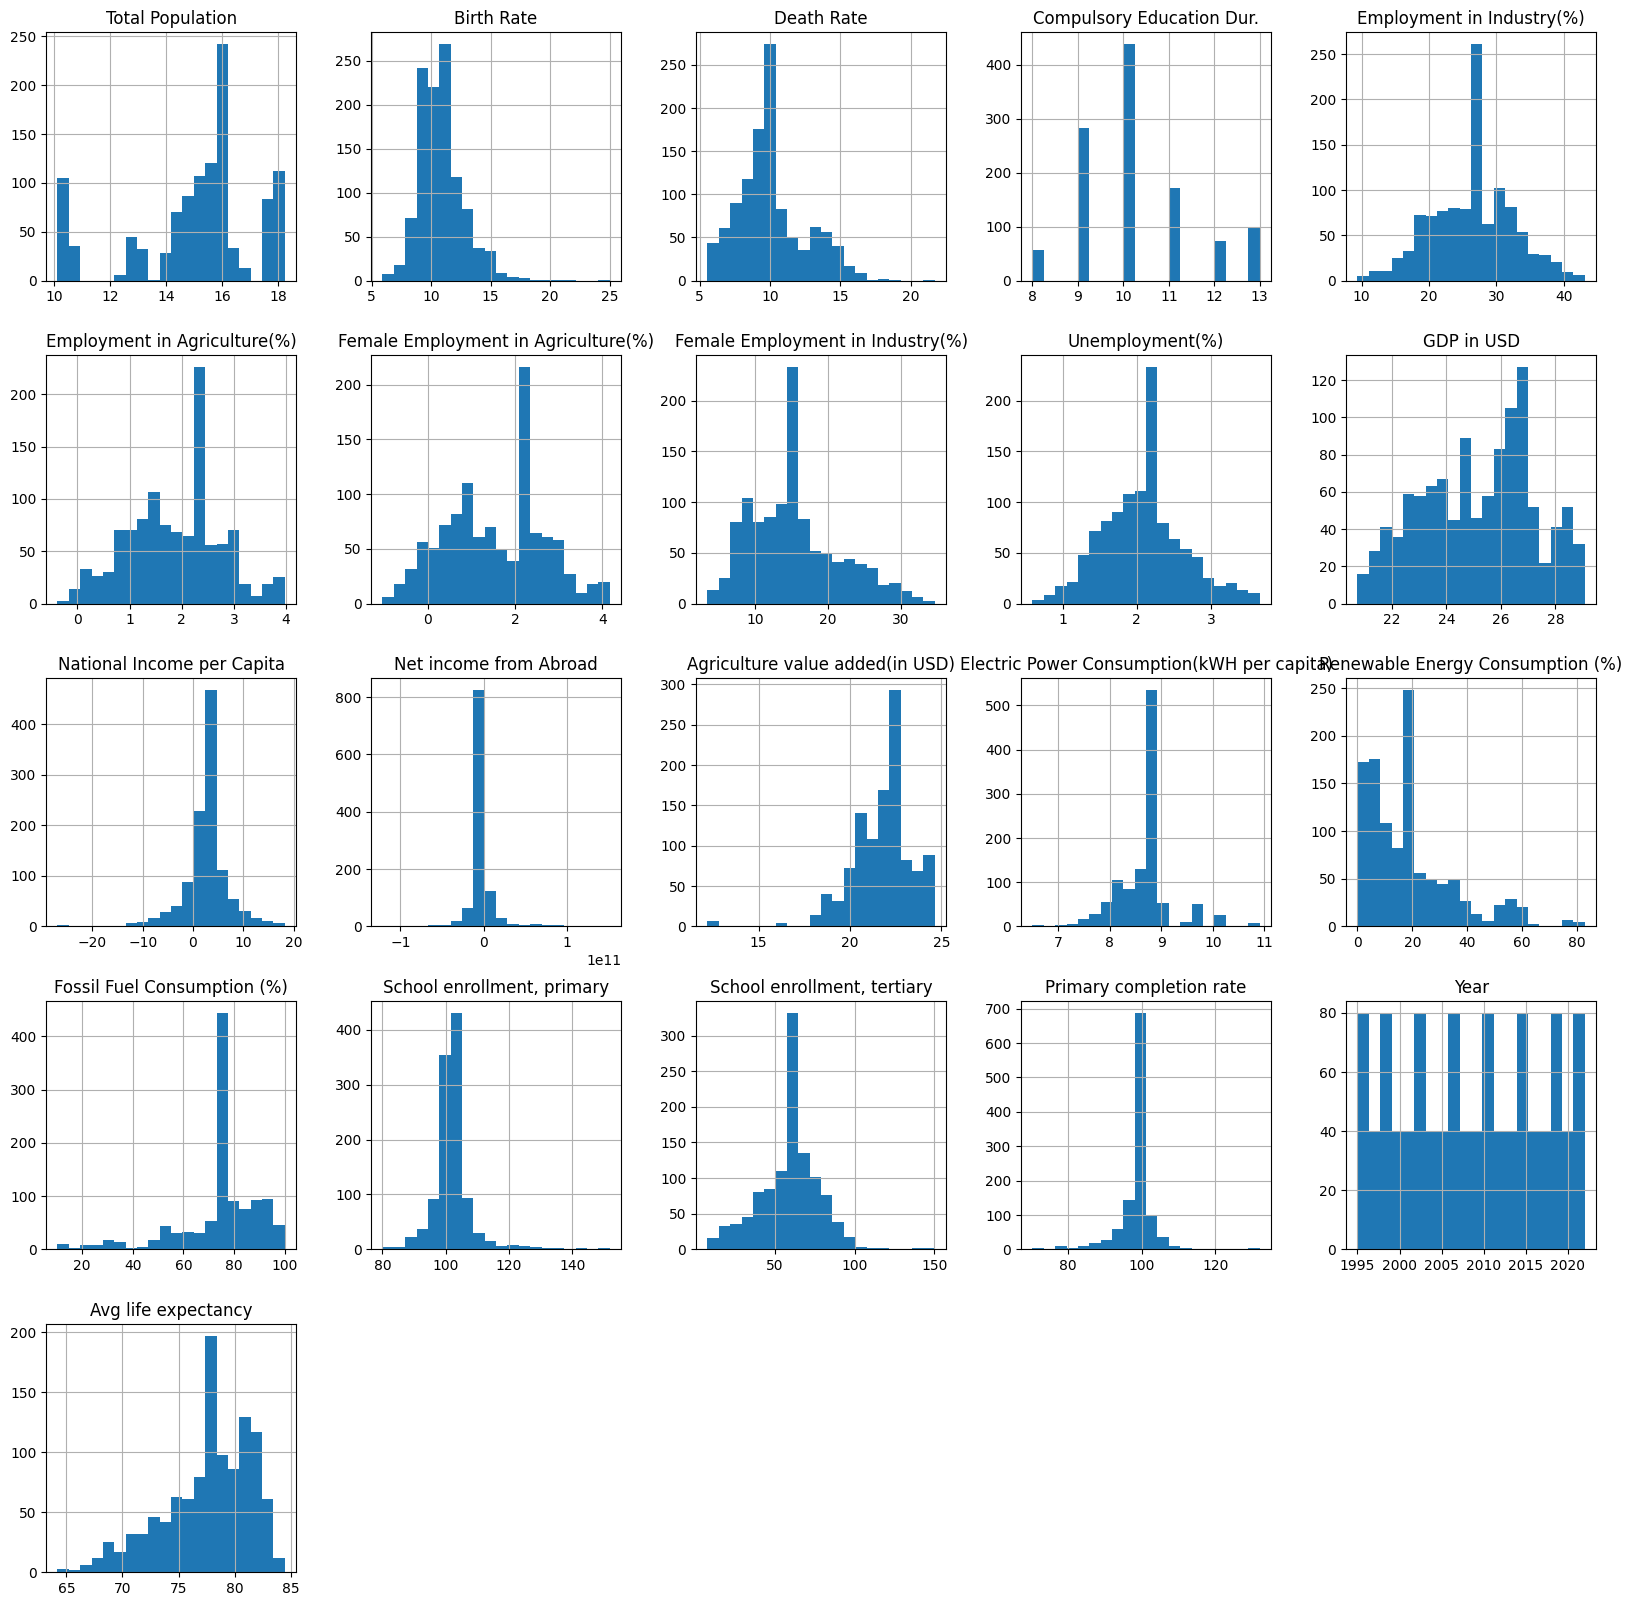

In [91]:
data.hist(figsize=(20,20), bins=20)
plt.show()

- Now all the features are normally distributed. That looks nice!!

## Training model

In [82]:
# # YOUR CODE HERE (OPTION) 
y = data["Electric Power Consumption(kWH per capita)"]
X = data.drop('Electric Power Consumption(kWH per capita)', axis='columns')

## Evaluation

In [83]:
# YOUR CODE HERE (OPTION) 

## Prediction

In [84]:
# YOUR CODE HERE (OPTION) 

## Results analysis

In [85]:
# YOUR CODE HERE (OPTION) 

## Conclusion

**Your conclusion**